In [1]:
#########################################
# author: Enes Çavuş
# last-update: Nov-2021
# subject: 2D-3D plotting approaches
#########################################

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

<a name="top"></a>


### General EDA - Data understanding ****** Skip This step if you want to see visualizations directly
---
* EDA - You are here...
* [Multivariate Visualizations - 2D](#2D)
* [Multivariate Visualizations - 3D](#3D)
---

In [3]:
iris = load_iris()
iris.DESCR.split('\n')
# pay attention to emphasized **petal length** and **petal width** correlation 
# check out the ending cells to see the high correlation in 2-dimensional and 3d visualizations

['.. _iris_dataset:',
 '',
 'Iris plants dataset',
 '--------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Number of Instances: 150 (50 in each of three classes)',
 '    :Number of Attributes: 4 numeric, predictive attributes and the class',
 '    :Attribute Information:',
 '        - sepal length in cm',
 '        - sepal width in cm',
 '        - petal length in cm',
 '        - petal width in cm',
 '        - class:',
 '                - Iris-Setosa',
 '                - Iris-Versicolour',
 '                - Iris-Virginica',
 '                ',
 '    :Summary Statistics:',
 '',
 '    ============== ==== ==== ======= ===== ====================',
 '                    Min  Max   Mean    SD   Class Correlation',
 '    ============== ==== ==== ======= ===== ====================',
 '    sepal length:   4.3  7.9   5.84   0.83    0.7826',
 '    sepal width:    2.0  4.4   3.05   0.43   -0.4194',
 '    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)',
 '    pe

In [4]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
print("Bincount :" , np.bincount(iris.target))
print("Unique   :" , np.unique(iris.target))
print("It is a : ", type(iris))
iris.target

Bincount : [50 50 50]
Unique   : [0 1 2]
It is a :  <class 'sklearn.utils.Bunch'>


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.data.shape

(150, 4)

In [8]:
(n_samples, n_features) = iris.data.shape
print("n_samples are row count, total data size : " , n_samples)
print("n_features are column count, total feature size : " , n_features)

n_samples are row count, total data size :  150
n_features are column count, total feature size :  4


In [9]:
iris.target.shape

(150,)

In [10]:
iris.keys() # name of the features -  4 types of flowers # same as iris.target_names

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
# iris.values() # same as iris whole info

In [12]:
print("1 label count : ", np.bincount(iris.target == 0))
print("2 label count : ", np.bincount(iris.target == 1))
print("3 label count : ", np.bincount(iris.target == 2))

iris.target == 1

1 label count :  [100  50]
2 label count :  [100  50]
3 label count :  [100  50]


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [13]:
iris.data[iris.target == 1] # tum setosa turune ait olan columnlar

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.2, 2.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.8, 2.7, 3.9, 1.2],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3

In [14]:
# bu columnların petal width degerleri
iris.data[iris.target == 1, 3 ] # 1 = setosa , diger 3 ise petal width yani 4 ozellikten 3. indexteki

array([1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. ,
       1.4, 1.3, 1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
       1.4, 1.7, 1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
       1.3, 1.2, 1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3])

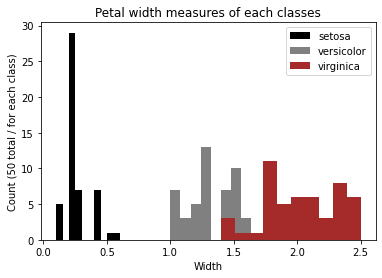

In [15]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
colors = ["black","gray","brown"]

for tur, color in zip(range(len(iris.target_names)) ,colors):
    plt.hist(iris.data[iris.target == tur, 3], 
             color = color # 3 for petal , tur for unique classes such as setosa vir...
            , label = iris.target_names[tur])
plt.title("Petal width measures of each classes")
plt.xlabel("Width")
plt.ylabel("Count (50 total / for each class)")
plt.legend(loc="best")
plt.show()

In [16]:
# Legend positioning - call the 'loc=' parameter
info_1 = '''

Extra - legend location options 
===============   =============
Location String   Location Code
===============   =============
'best'            0
'upper right'     1
'upper left'      2
'lower left'      3
'lower right'     4
'right'           5
'center left'     6
'center right'    7
'lower center'    8
'upper center'    9
'center'          10
===============   ============= 
        
'''
print(info_1.strip())

Extra - legend location options 
===============   =============
Location String   Location Code
===============   =============
'best'            0
'upper right'     1
'upper left'      2
'lower left'      3
'lower right'     4
'right'           5
'center left'     6
'center right'    7
'lower center'    8
'upper center'    9
'center'          10
===============   =============


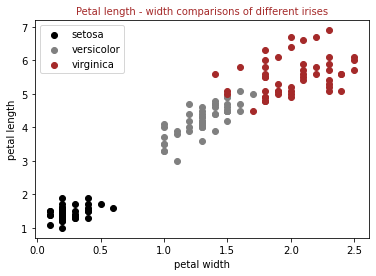

In [17]:
colors = ["black","gray","brown"]

for classtype, color in zip(range(len(iris.target_names)), colors):
    # we need x and y values - x for petal width, y for petal length or whatever we want
    plt.scatter(iris.data[iris.target == classtype, 3],
               iris.data[iris.target == classtype, 2],
               label=iris.target_names[classtype],
               c = color)
plt.legend(loc="best")
plt.xlabel("petal width")
plt.ylabel("petal length")
plt.title("Petal length - width comparisons of different irises",
          fontdict={'color': "brown", 'fontsize': 10 }) # some custom changes of title parameters
plt.show()

<a name="2D"></a>
[Back to Top](#top)

## Scatter Plot for each combination of features -- Custom Pairplot -- plt scatter martix

In [18]:
# exercise - change  indexes of each data ,
# find the best seperated ones 
# we got 4 feature so finding two permutations of 0-1-2-3
from itertools import permutations, combinations
# Get all combinations of [0,1,2,3]
cmb = list(combinations(list(range(iris.data.shape[1])), 2)) # get iris column count and make a list 
print(cmb[0])
print(cmb)
print(len(cmb))

(0, 1)
[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
6


In [19]:
# test before applying in production
test_code_1 =  '''
colors = ["black","gray","brown"]
features = ["sepal length","sepal width","petal length","petal length"] 
plt.figure(figsize=(20,10))
for i in range(len(cmb)):
    for classtype, color in zip(range(len(iris.target_names)), colors):
        # we need x and y values - x for petal width, y for petal length or whatever we want
        plt.subplot(len(cmb)/2, 2, i+1) # 2 rows, 2 column, 1st subplot = bottom
        plt.scatter(iris.data[iris.target == classtype, cmb[i][0]],
                   iris.data[iris.target == classtype, cmb[i][1]],
                   label=iris.target_names[classtype],
                   c = color)
        plt.title(str(features[cmb[i][0]]) +   " " + str(features[cmb[i][1]]) + " comparison", fontdict={'color': "brown", 'fontsize': 15 })
        plt.xlabel(features[cmb[i][0]])
        plt.xlabel(features[cmb[i][1]])
        plt.legend(loc="best")
plt.show()
'''
print(test_code_1.strip())

colors = ["black","gray","brown"]
features = ["sepal length","sepal width","petal length","petal length"] 
plt.figure(figsize=(20,10))
for i in range(len(cmb)):
    for classtype, color in zip(range(len(iris.target_names)), colors):
        # we need x and y values - x for petal width, y for petal length or whatever we want
        plt.subplot(len(cmb)/2, 2, i+1) # 2 rows, 2 column, 1st subplot = bottom
        plt.scatter(iris.data[iris.target == classtype, cmb[i][0]],
                   iris.data[iris.target == classtype, cmb[i][1]],
                   label=iris.target_names[classtype],
                   c = color)
        plt.title(str(features[cmb[i][0]]) +   " " + str(features[cmb[i][1]]) + " comparison", fontdict={'color': "brown", 'fontsize': 15 })
        plt.xlabel(features[cmb[i][0]])
        plt.xlabel(features[cmb[i][1]])
        plt.legend(loc="best")
plt.show()


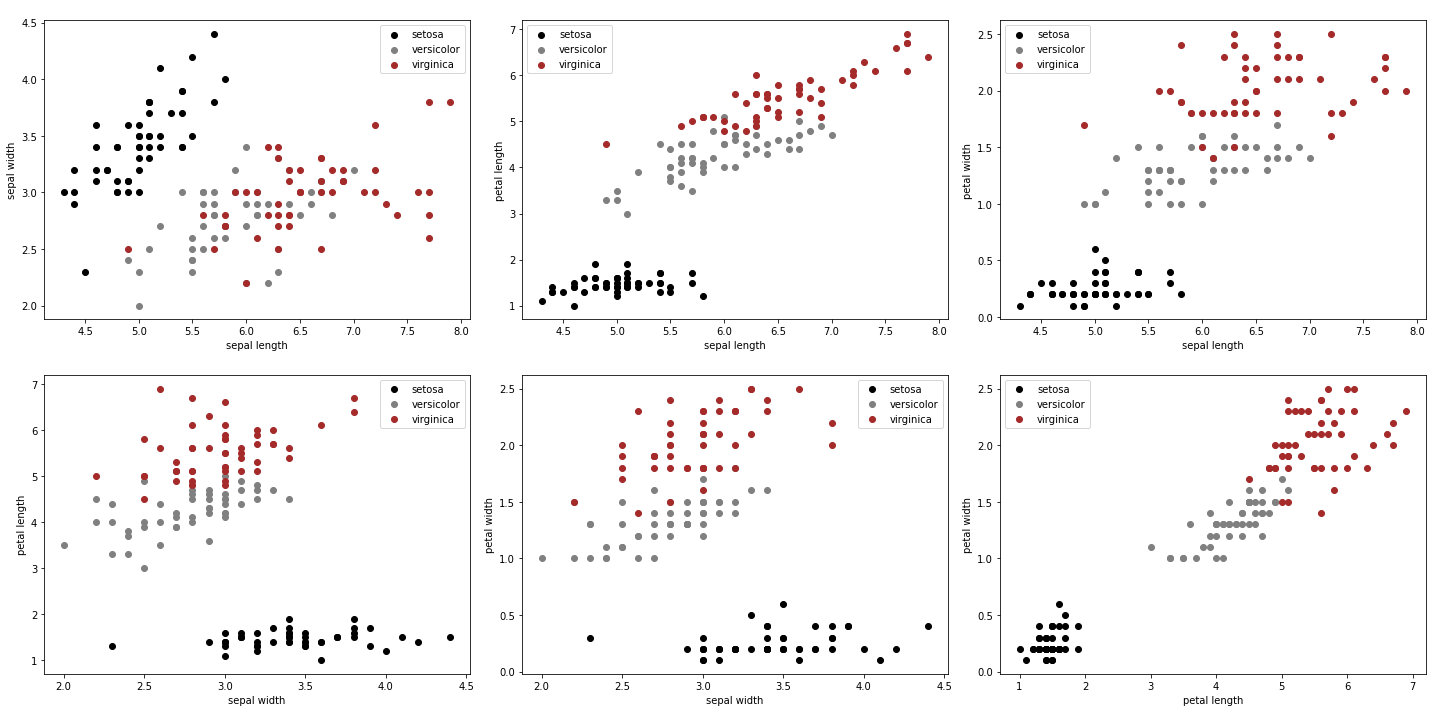

In [20]:
colors = ["black","gray","brown"]
features = ["sepal length","sepal width","petal length","petal width"] 
plt.figure(figsize=(20,10))
for i in range(len(cmb)):
    for classtype, color in zip(range(len(iris.target_names)), colors):
        # we need x and y values - x for petal width, y for petal length or whatever we want
        plt.subplot(2, 3, i+1) # 2 rows, 2 column, 1st subplot = bottom
        plt.scatter(iris.data[iris.target == classtype, cmb[i][0]],
                   iris.data[iris.target == classtype, cmb[i][1]],
                   label=iris.target_names[classtype],
                   c = color)
        plt.title(str(features[cmb[i][0]]) +   " " + str(features[cmb[i][1]]) + " comparison", fontdict={'color': "white", 'fontsize': 10 })
        plt.xlabel(features[cmb[i][0]])
        plt.ylabel(features[cmb[i][1]])
        plt.tight_layout()
        plt.legend(loc="best")
plt.show()

In [21]:
# pair plot with pandas firstly, numpy array to pandas dataframe transformation
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df_with_classes = df.copy()
df_with_classes["class"] = pd.Series(iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


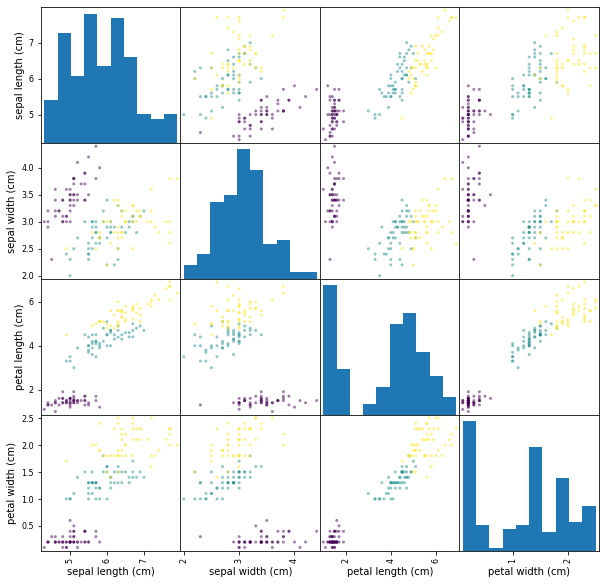

In [22]:
pd.plotting.scatter_matrix(df,figsize=(10,10), c=iris.target); # put semi-commo otherwise it'l return lots of string

In [23]:
df_with_classes.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


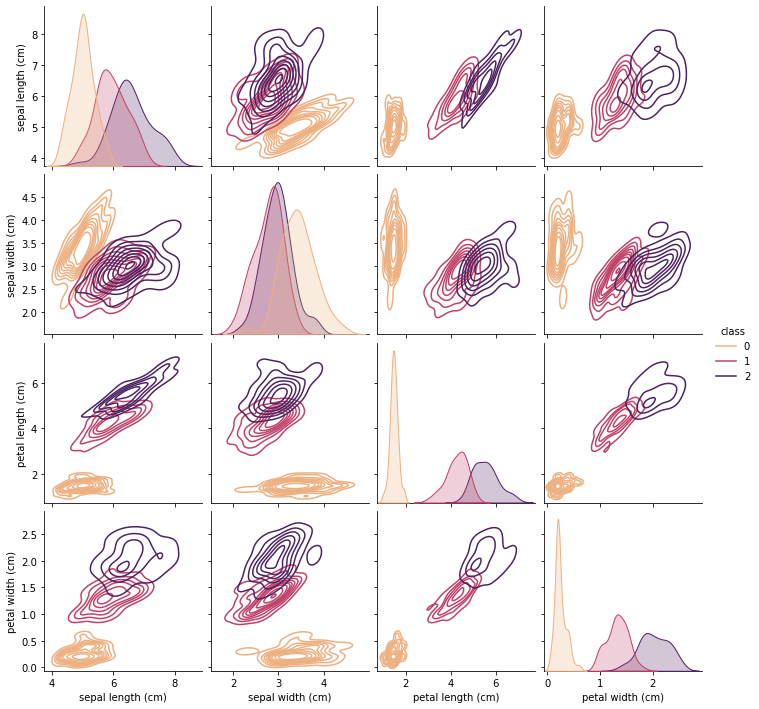

In [24]:
import seaborn as sns
sns.pairplot(df_with_classes, hue="class", palette="flare", markers=["o", "s", "D"], kind="kde")

<a name="3D"></a>

[Back to Top](#top)

## 3D Projection - Visualization 

In [25]:
# triple combinations
cmb3 = list(combinations(list(range(iris.data.shape[1])), 3)) # get iris column count and make a list 
print(cmb3[0])
print(cmb3)
print(len(cmb3))

(0, 1, 2)
[(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]
4


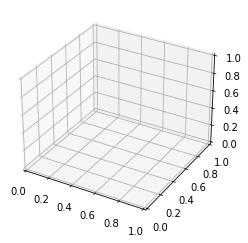

In [26]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(5,4))
ax = plt.axes(projection='3d') # creating a 3d sample plot axes

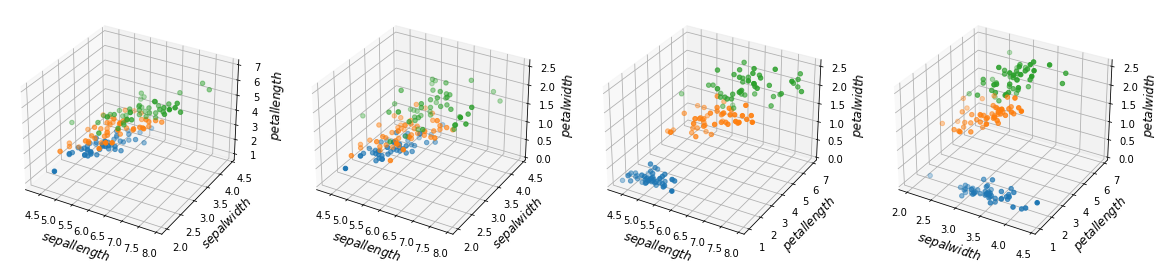

In [27]:
features = ["sepal length","sepal width","petal length","petal width"] 
figure = plt.figure(1, figsize = (20, 20))

for i in range(len(cmb3)):
    for classtype, color in zip(range(len(iris.target_names)), colors):
        abc = plt.subplot(1,4,i+1, projection='3d')
        # we need x and y values - x for petal width, y for petal length or whatever we want
        abc.scatter(iris.data[iris.target == classtype, cmb3[i][0]],
                   iris.data[iris.target == classtype, cmb3[i][1]],
                   iris.data[iris.target == classtype, cmb3[i][2]]
                    ) # cmap=plt.cm.magma # optional
        abc.set_xlabel('$'+ str(features[cmb3[i][0]])+'$', fontsize=12, rotation=60)
        abc.set_ylabel('$'+ str(features[cmb3[i][1]])+'$', fontsize=12, rotation=60)
        abc.set_zlabel('$'+ str(features[cmb3[i][2]])+'$', fontsize=12, rotation=60)
        
plt.savefig("figures/scatter_3D.png", dpi=figure.dpi)
plt.show()

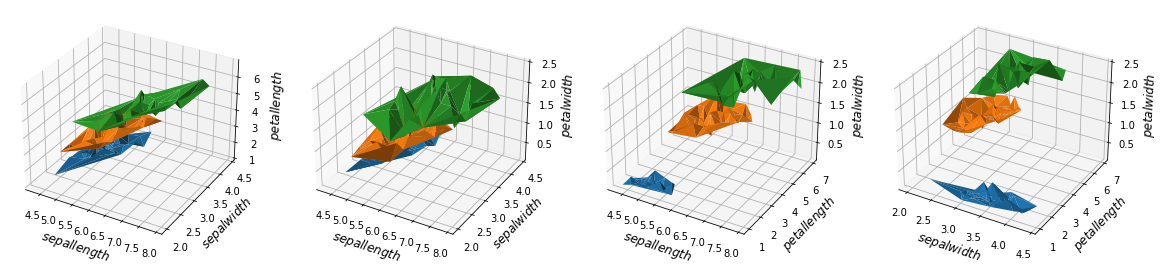

In [28]:
features = ["sepal length","sepal width","petal length","petal width"] 
figure = plt.figure(1, figsize = (20, 20))

for i in range(len(cmb3)):
    for classtype, color in zip(range(len(iris.target_names)), colors):
        # we need x and y values - x for petal width, y for petal length or whatever we want
        abc = plt.subplot(1, 4, i+1, projection='3d') # 2 rows, 2 column, 1st subplot = bottom
        abc.plot_trisurf(iris.data[iris.target == classtype, cmb3[i][0]],
                   iris.data[iris.target == classtype, cmb3[i][1]],
                   iris.data[iris.target == classtype, cmb3[i][2]]
                    ) # cmap=plt.cm.magma # optional
        ax = figure.gca(projection='3d')
        ax.set_xlabel('$'+ str(features[cmb3[i][0]])+'$', fontsize=12, rotation=60)
        ax.set_ylabel('$'+ str(features[cmb3[i][1]])+'$', fontsize=12, rotation=60)
        ax.set_zlabel('$'+ str(features[cmb3[i][2]])+'$', fontsize=12, rotation=60)
plt.savefig("figures/trisurf_plot.png", dpi=figure.dpi)
plt.show()

**___Enes Çavuş___**